In [102]:
# Import modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from bgreference import refseq 
import collections
from collections import Counter
from itertools import islice

import matplotlib.patches as patches
from matplotlib.patches import Rectangle

# split into even chunks
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


In [103]:
import numpy as np

def get_mut(x):    
    try:
        triplet = '{}_{}'.format(refseq('sarscov2', '0', x['POS']-1, 3).replace('\n', 'N'), 
                                x['ALT'])
    except:
        triplet = 'NNN'
    return triplet

def order_muts_full():    
    order = []
    first = ['A', 'C', 'G', 'T']
    pyr = ['C', 'T']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)
    first = ['T', 'G', 'C', 'A']
    pyr = ['G', 'A']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)    
    return order

def slicing_window(seq, n=3):
    """
    Fast slicing window
    :param seq:
    :param n:
    :return:
    """    
    
    it = iter(seq)
    result = ''.join(islice(it, n))    
    
    if len(result) == n:
        yield result    
        
    for elem in it:
        result = result[1:] + elem
        #print(result)
        yield result
        
l = refseq('sarscov2', '0', 1, 100000000).rstrip()
count_genome_compo = Counter(list(slicing_window(l)))
print(count_genome_compo)

Counter({'TTT': 1004, 'AAA': 923, 'TTA': 876, 'TGT': 858, 'TTG': 817, 'ACA': 809, 'ATT': 773, 'AAT': 761, 'CTT': 738, 'ATG': 725, 'TAA': 719, 'CAA': 703, 'GTT': 700, 'ACT': 674, 'TGA': 630, 'TAT': 622, 'AAC': 615, 'TAC': 609, 'AGA': 605, 'AAG': 580, 'CTA': 561, 'TGG': 554, 'GTG': 552, 'TCA': 549, 'TGC': 547, 'TCT': 542, 'GAA': 535, 'GCT': 521, 'TTC': 518, 'AGT': 507, 'CTG': 495, 'CAT': 484, 'ATA': 471, 'GTA': 469, 'CAC': 459, 'GGT': 454, 'GAT': 440, 'CAG': 438, 'TAG': 427, 'ACC': 376, 'GCA': 372, 'CCA': 354, 'CCT': 344, 'GAC': 340, 'ATC': 339, 'AGG': 329, 'AGC': 301, 'GAG': 297, 'CTC': 287, 'GGA': 282, 'GTC': 269, 'GGC': 223, 'TCC': 209, 'GCC': 187, 'CGT': 171, 'ACG': 164, 'GGG': 134, 'CCC': 116, 'TCG': 113, 'CGC': 97, 'CGA': 95, 'GCG': 88, 'CGG': 76, 'CCG': 74})


In [104]:
#Run ONLY ONE of the next two blocks. 1st is for ALL mutations, 2nd for SYN mutations. The cell plots are valid for both.

In [105]:
#intra-host All mutations.
#multiVCF flag yes
df = pd.read_csv('../output/paired/allmuta_annot_paired.csv', sep ='\t')
letters = ['A', 'T', 'C', 'G']
df = df.rename(columns={'pos': 'POS', 'ref': 'REF', "alt":"ALT"})

print("TOTAL mutations, including all AF and indels: " + str(len(df)))
print("TOTAL mutations excluding indels: "+str(len(df[(df['REF'].isin(letters))&(df['ALT'].isin(letters))])))
print("TOTAL mutations excluding indels, at AF > 0.01: "+str(len(df[(df['REF'].isin(letters))&(df['ALT'].isin(letters))& (df['AF']>0.01)])))
print("TOTAL indels: "+str(len(df[(~df['REF'].isin(letters))|(~df['ALT'].isin(letters))])))
print("TOTAL indels, at AF > 0.01: "+str(len(df[(~df['REF'].isin(letters))|(~df['ALT'].isin(letters))& (df['AF']>0.01)])))

#Figure 1a: All mutations. AF 0.02 - 0.5
df002_05 = df[(df['AF']>0.02) & (df['AF']<0.5)]
df002_05 = df002_05[['POS', 'REF', 'ALT']]
print ("0.02 - 0.5. Count: " +str(len(df002_05)))
df002_05_unique_muts = df002_05[(df002_05['REF'].isin(letters))&(df002_05['ALT'].isin(letters))]
print ("0.02 - 0.5. Count excluding indels: " +str(len(df002_05_unique_muts)))

#Figure 2a: All mutations. AF 0.01 - 0.02
df001_002 = df[(df['AF']>0.01) & (df['AF']<0.02)]
df001_002 = df001_002[['POS', 'REF', 'ALT']]
print ("0.01 - 0.02. Count: " +str(len(df001_002)))
df001_002_unique_muts = df001_002[(df001_002['REF'].isin(letters))&(df001_002['ALT'].isin(letters))]
print ("0.01 - 0.02. Count excluding indels:: " +str(len(df001_002_unique_muts)))

#Figure 3a: All mutations. AF 0.05 - 0.5
df005_05 = df[(df['AF']>0.05) & (df['AF']<0.5)]
df005_05 = df005_05[['POS', 'REF', 'ALT']]
print ("0.05 - 0.5. Count: " +str(len(df005_05)))
df005_05_unique_muts = df005_05[(df005_05['REF'].isin(letters))&(df005_05['ALT'].isin(letters))]
print ("0.05 - 0.5. Count excluding indels:: " +str(len(df005_05_unique_muts)))

#Figure 4a: All mutations. AF > 0.5
df05 = df[(df['AF']>0.5)]
df05 = df05[['POS', 'REF', 'ALT']]
print ("> 0.5. Count: " +str(len(df05)))
df05_unique_muts = df05[(df05['REF'].isin(letters))&(df05['ALT'].isin(letters))]
print ("> 0.5. Count excluding indels: " +str(len(df05_unique_muts)))

#Figure 5a: All mutations. AF< 0.01
df001 = df[(df['AF']<0.01)]
df001 = df001[['POS', 'REF', 'ALT']]
print ("< 0.01. Count: " +str(len(df001)))
df001_unique_muts = df001[(df001['REF'].isin(letters))&(df001['ALT'].isin(letters))]
print ("< 0.01. Count excluding indels:: " +str(len(df001_unique_muts)))

#Figure 6a: All mutations. AF 0.01 - 0.5
df001_05 = df[(df['AF']>0.01)& (df['AF']<0.5)]
df001_05 = df001_05[['POS', 'REF', 'ALT']]
print ("0.01 - 0.5. Count: " +str(len(df001_05)))
df001_05_unique_muts = df001_05[(df001_05['REF'].isin(letters))&(df001_05['ALT'].isin(letters))]
print ("0.01 - 0.5. Count excluding indels:: " +str(len(df001_05_unique_muts)))

#Figure 7a: All mutations. AF 0.01 - 0.05
df001_005 = df[(df['AF']>0.01) & (df['AF']<0.05)]
df001_005 = df001_005[['POS', 'REF', 'ALT']]
print ("0.01 - 0.05. Count: " +str(len(df001_005)))
df001_005_unique_muts = df001_005[(df001_005['REF'].isin(letters))&(df001_005['ALT'].isin(letters))]
print ("0.01 - 0.05. Count excluding indels:: " +str(len(df001_005_unique_muts)))

#Figure 8a: All mutations. AF > 0.05
df005 = df[(df['AF']>0.05)]
df005 = df005[['POS', 'REF', 'ALT']]
print ("> 0.05. Count: " +str(len(df005)))
df005_unique_muts = df005[(df005['REF'].isin(letters))&(df005['ALT'].isin(letters))]
print ("> 0.05. Count excluding indels:: " +str(len(df005_unique_muts)))

#Figure 9a: All mutations. AF < 0.05
dfmenor005 = df[(df['AF']<0.05)]
dfmenor005 = dfmenor005[['POS', 'REF', 'ALT']]
print ("< 0.05. Count: " +str(len(dfmenor005)))
dfmenor005_unique_muts = dfmenor005[(dfmenor005['REF'].isin(letters))&(dfmenor005['ALT'].isin(letters))]
print ("< 0.05. Count excluding indels:: " +str(len(dfmenor005_unique_muts)))

#Figure 10a: All mutations. AF 0.02 - 0.05
df002_005 = df[(df['AF']>0.02) & (df['AF']<0.05)]
df002_005 = df002_005[['POS', 'REF', 'ALT']]
print ("0.02 - 0.05. Count: " +str(len(df002_005)))
df002_005_unique_muts = df002_005[(df002_005['REF'].isin(letters))&(df002_005['ALT'].isin(letters))]
print ("0.02 - 0.05. Count excluding indels:: " +str(len(df002_005_unique_muts)))

TOTAL mutations, including all AF and indels: 224071
TOTAL mutations excluding indels: 224071
TOTAL mutations excluding indels, at AF > 0.01: 138717
TOTAL indels: 0
TOTAL indels, at AF > 0.01: 0
0.02 - 0.5. Count: 62513
0.02 - 0.5. Count excluding indels: 62513
0.01 - 0.02. Count: 49014
0.01 - 0.02. Count excluding indels:: 49014
0.05 - 0.5. Count: 29401
0.05 - 0.5. Count excluding indels:: 29401
> 0.5. Count: 27077
> 0.5. Count excluding indels: 27077
< 0.01. Count: 85307
< 0.01. Count excluding indels:: 85307
0.01 - 0.5. Count: 111580
0.01 - 0.5. Count excluding indels:: 111580
0.01 - 0.05. Count: 82011
0.01 - 0.05. Count excluding indels:: 82011
> 0.05. Count: 56538
> 0.05. Count excluding indels:: 56538
< 0.05. Count: 167365
< 0.05. Count excluding indels:: 167365
0.02 - 0.05. Count: 32944
0.02 - 0.05. Count excluding indels:: 32944


In [91]:
#intra-host SYN
#multiVCF flag yes
df = pd.read_csv('../output/paired/allmuta_annot_paired.csv', sep ='\t')
letters = ['A', 'T', 'C', 'G']
df = df.rename(columns={'pos': 'POS', 'ref': 'REF', "alt":"ALT"})

print("TOTAL mutations, including all AF and indels: " + str(len(df)))
print("TOTAL mutations excluding indels: "+str(len(df[(df['REF'].isin(letters))&(df['ALT'].isin(letters))])))
print("TOTAL mutations excluding indels, at AF > 0.01: "+str(len(df[(df['REF'].isin(letters))&(df['ALT'].isin(letters))& (df['AF']>0.01)])))
print("TOTAL indels: "+str(len(df[(~df['REF'].isin(letters))|(~df['ALT'].isin(letters))])))
print("TOTAL indels, at AF > 0.01: "+str(len(df[(~df['REF'].isin(letters))|(~df['ALT'].isin(letters))& (df['AF']>0.01)])))
print("\nSYN/UP/DOWNSTREAM mutations.\n")

#Figure 1b: Non-protein affecting. AF 0.02 - 0.5
df002_05 = df[(df['AF']>0.02) & (df['AF']<0.5) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df002_05 = df002_05[['POS', 'REF', 'ALT']]
print ("0.02 - 0.5. Count: " +str(len(df002_05)))
df002_05_unique_muts = df002_05[(df002_05['REF'].isin(letters))&(df002_05['ALT'].isin(letters))]

#Figure 2b: Non-protein affecting. AF 0.01 - 0.02
df001_002 = df[(df['AF']>0.01) & (df['AF']<0.02) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df001_002 = df001_002[['POS', 'REF', 'ALT']]
print ("0.01 - 0.02. Count: " +str(len(df001_002)))
df001_002_unique_muts = df001_002[(df001_002['REF'].isin(letters))&(df001_002['ALT'].isin(letters))]

#Figure 3b: Non-protein affecting. AF 0.05 - 0.5
df005_05 = df[(df['AF']>0.05) & (df['AF']<0.5) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df005_05 = df005_05[['POS', 'REF', 'ALT']]
print ("0.05 - 0.5. Count: " +str(len(df005_05)))
df005_05_unique_muts = df005_05[(df005_05['REF'].isin(letters))&(df005_05['ALT'].isin(letters))]

#Figure 4b: Non-protein affecting. AF > 0.5
df05 = df[(df['AF']>0.5) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df05 = df05[['POS', 'REF', 'ALT']]
print ("> 0.5. Count: " +str(len(df05)))
df05_unique_muts = df05[(df05['REF'].isin(letters))&(df05['ALT'].isin(letters))]
print ("> 0.5. Count excluding  N's: " +str(len(df05_unique_muts)))

#Figure 5b: Non-protein affecting. AF< 0.01
df001 = df[(df['AF']<0.01) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df001 = df001[['POS', 'REF', 'ALT']]
print ("< 0.01. Count: " +str(len(df001)))
df001_unique_muts = df001[(df001['REF'].isin(letters))&(df001['ALT'].isin(letters))]

#Figure 6b: Non-protein affecting. AF 0.01 - 0.5
df001_05 = df[(df['AF']>0.01) & (df['AF']<0.5) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df001_05 = df001_05[['POS', 'REF', 'ALT']]
print ("0.01 - 0.5. Count: " +str(len(df001_05)))
df001_05_unique_muts = df001_05[(df001_05['REF'].isin(letters))&(df001_05['ALT'].isin(letters))]

#Figure 7b: Non-protein affecting. AF 0.01 - 0.05
df001_005 = df[(df['AF']>0.01) & (df['AF']<0.05) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df001_005 = df001_005[['POS', 'REF', 'ALT']]
print ("0.01 - 0.05. Count: " +str(len(df001_005)))
df001_005_unique_muts = df001_005[(df001_005['REF'].isin(letters))&(df001_005['ALT'].isin(letters))]

#Figure 8b: Non-protein affecting. AF > 0.05
df005 = df[(df['AF']>0.05) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df005 = df005[['POS', 'REF', 'ALT']]
print ("> 0.05. Count: " +str(len(df005)))
df005_unique_muts = df005[(df005['REF'].isin(letters))&(df005['ALT'].isin(letters))]

#Figure 9b: Non-protein affecting. AF < 0.05
dfmenor005 = df[(df['AF']<0.05) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
dfmenor005 = dfmenor005[['POS', 'REF', 'ALT']]
print ("< 0.05. Count: " +str(len(dfmenor005)))
dfmenor005_unique_muts = dfmenor005[(dfmenor005['REF'].isin(letters))&(dfmenor005['ALT'].isin(letters))]

#Figure 10b: Non-protein affecting. AF 0.02 - 0.05
df002_005 = df[(df['AF']>0.02) & (df['AF']<0.05) & (df["csqn_type"].isin(["upstream_gene_variant","downstream_gene_variant","synonymous_variant"]))]
df002_005 = df002_005[['POS', 'REF', 'ALT']]
print ("0.02 - 0.05. Count: " +str(len(df002_005)))
df002_005_unique_muts = df002_005[(df002_005['REF'].isin(letters))&(df002_005['ALT'].isin(letters))]

TOTAL mutations, including all AF and indels: 224071
TOTAL mutations excluding indels: 224071
TOTAL mutations excluding indels, at AF > 0.01: 138717
TOTAL indels: 0
TOTAL indels, at AF > 0.01: 0

SYN/UP/DOWNSTREAM mutations.

0.02 - 0.5. Count: 18364
0.01 - 0.02. Count: 14144
0.05 - 0.5. Count: 8711
> 0.5. Count: 13810
> 0.5. Count excluding  N's: 13810
< 0.01. Count: 26693
0.01 - 0.5. Count: 32529
0.01 - 0.05. Count: 23782
> 0.05. Count: 22539
< 0.05. Count: 50490
0.02 - 0.05. Count: 9617


/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


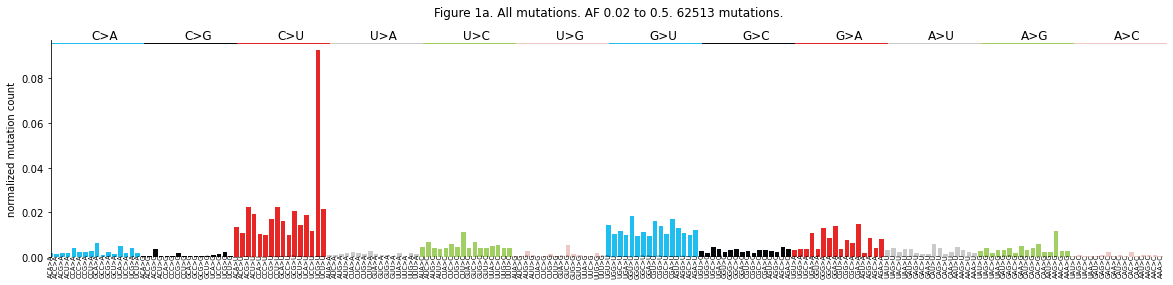

In [106]:
#Fig1. AF 0.02 - 0.5
df002_05_unique_muts['FULL_MUT'] = df002_05_unique_muts.apply(get_mut, axis = 1)
df002_05_unique_muts_count=df002_05_unique_muts[['FULL_MUT', 'POS']]
df002_05_unique_muts_count = df002_05_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df002_05_unique_muts_counter_triplets_order = df002_05_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df002_05_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))



colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 1a. All mutations. AF 0.02 to 0.5. "+str(len(df002_05_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/002_05.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


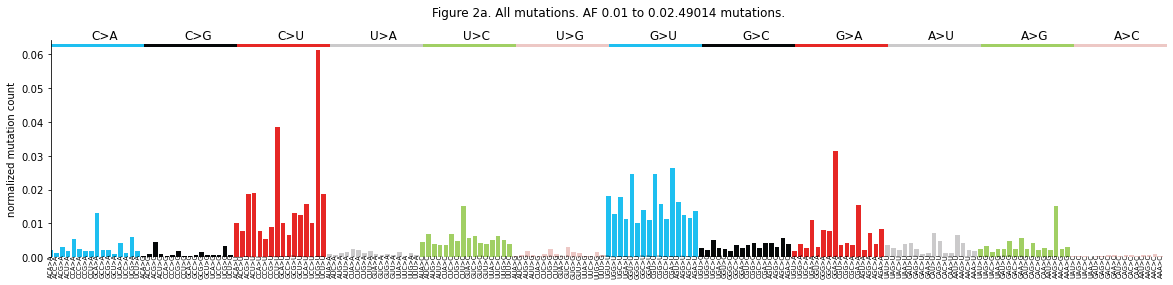

In [107]:
#Figure 2. AF 0.01 - 0.02
df001_002_unique_muts['FULL_MUT'] = df001_002_unique_muts.apply(get_mut, axis = 1)
df001_002_unique_muts_count=df001_002_unique_muts[['FULL_MUT', 'POS']]
df001_002_unique_muts_count = df001_002_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df001_002_unique_muts_counter_triplets_order = df001_002_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df001_002_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 2a. All mutations. AF 0.01 to 0.02."+str(len(df001_002_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/001_002.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


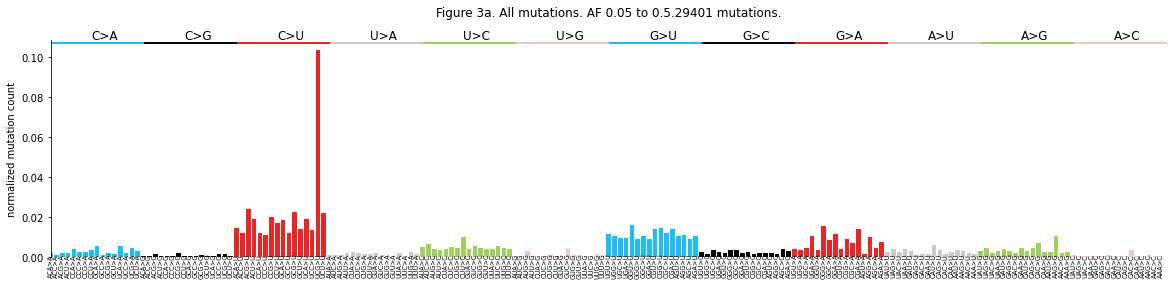

In [108]:
#Figure 3. All mutations. AF 0.05 - 0.5
df005_05_unique_muts['FULL_MUT'] = df005_05_unique_muts.apply(get_mut, axis = 1)
df005_05_unique_muts_count=df005_05_unique_muts[['FULL_MUT', 'POS']]
df005_05_unique_muts_count = df005_05_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df005_05_unique_muts_counter_triplets_order = df005_05_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df005_05_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 3a. All mutations. AF 0.05 to 0.5."+str(len(df005_05_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/005_05.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


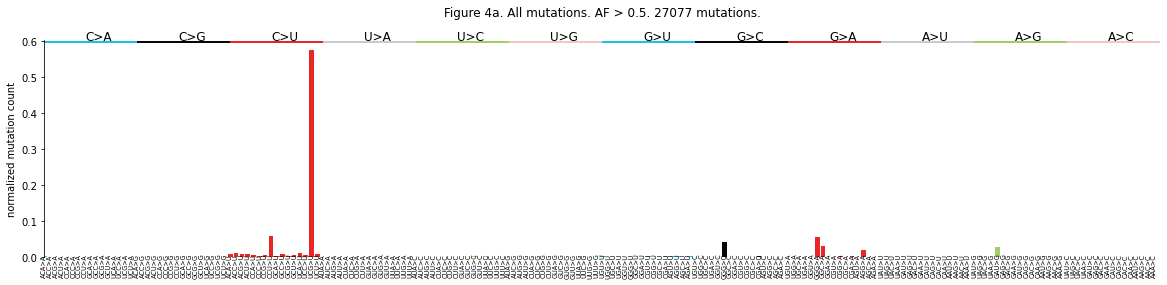

In [109]:
#Figure 4. All mutations. AF > 0.5
df05_unique_muts['FULL_MUT'] = df05_unique_muts.apply(get_mut, axis = 1)
df05_unique_muts_count=df05_unique_muts[['FULL_MUT', 'POS']]
df05_unique_muts_count = df05_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df05_unique_muts_counter_triplets_order = df05_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df05_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 4a. All mutations. AF > 0.5. "+str(len(df05_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.01),16,0.007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/more0.5.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


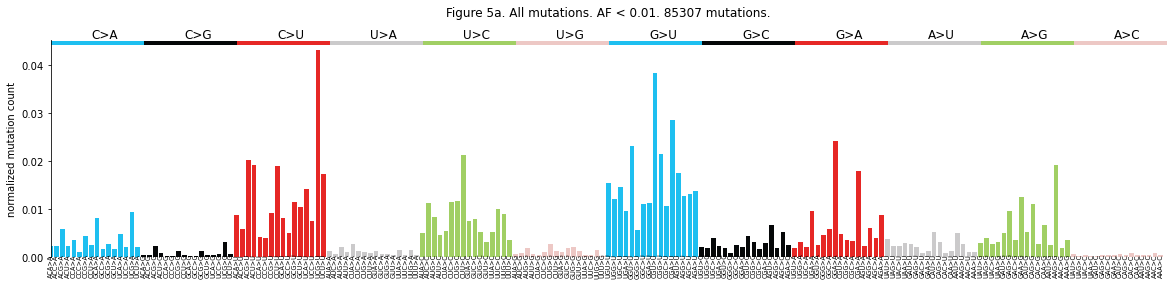

In [110]:
#Figure 5. All mutations. AF < 0.01
df001_unique_muts['FULL_MUT'] = df001_unique_muts.apply(get_mut, axis = 1)
df001_unique_muts_count=df001_unique_muts[['FULL_MUT', 'POS']]
df001_unique_muts_count = df001_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df001_unique_muts_counter_triplets_order = df001_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df001_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 5a. All mutations. AF < 0.01. "+str(len(df001_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.001),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/less001.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


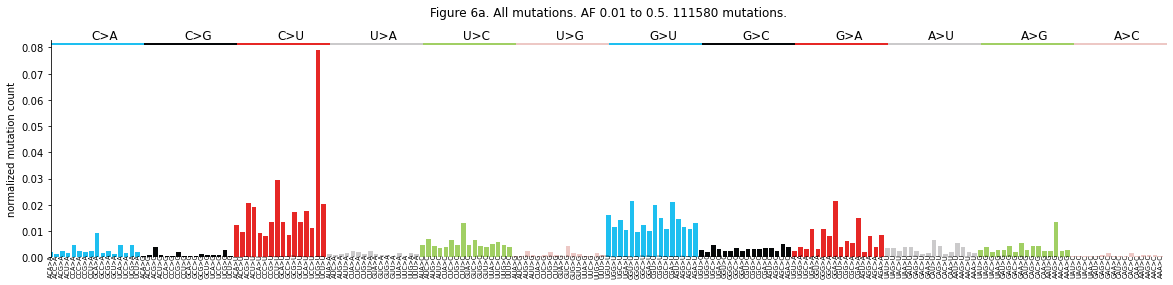

In [111]:
#Figure 6. All mutations. AF 0.01 - 0.5
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

df001_05_unique_muts['FULL_MUT'] = df001_05_unique_muts.apply(get_mut, axis = 1)
df001_05_unique_muts_count=df001_05_unique_muts[['FULL_MUT', 'POS']]
df001_05_unique_muts_count = df001_05_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df001_05_unique_muts_counter_triplets_order = df001_05_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df001_05_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))



colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 6a. All mutations. AF 0.01 to 0.5. "+str(len(df001_05_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/001_05.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


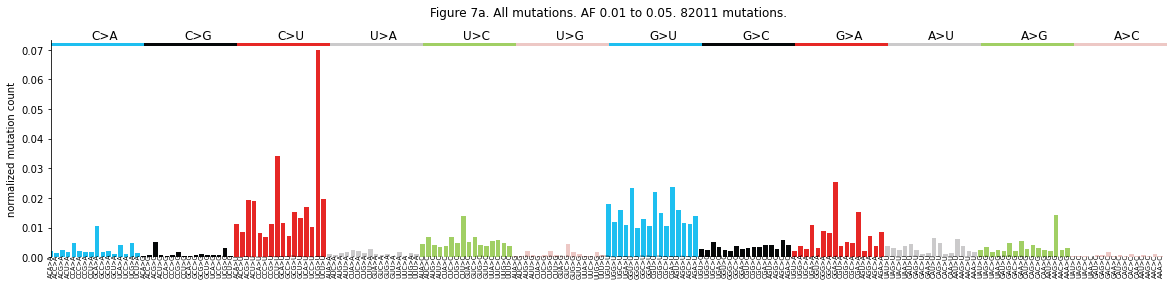

In [112]:
#Figure 7. All mutations. AF 0.01 - 0.05
df001_005_unique_muts['FULL_MUT'] = df001_005_unique_muts.apply(get_mut, axis = 1)
df001_005_unique_muts_count=df001_005_unique_muts[['FULL_MUT', 'POS']]
df001_005_unique_muts_count = df001_005_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df001_005_unique_muts_counter_triplets_order = df001_005_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df001_005_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 7a. All mutations. AF 0.01 to 0.05. "+str(len(df001_005_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/001_005.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


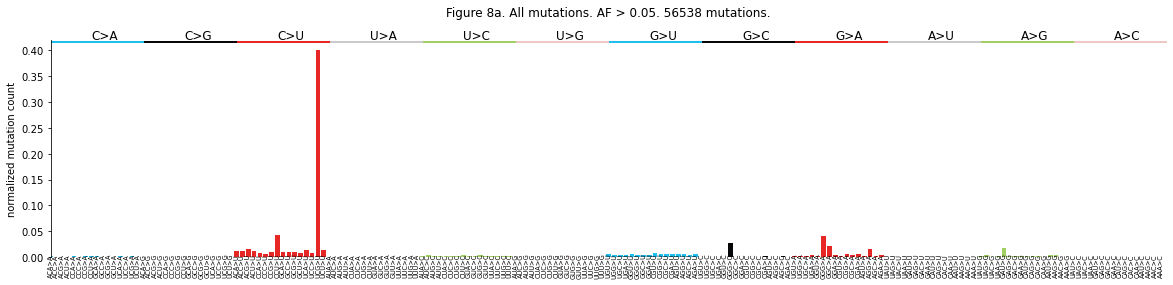

In [113]:
#Figure 8. All mutations. AF > 0.05
df005_unique_muts['FULL_MUT'] = df005_unique_muts.apply(get_mut, axis = 1)
df005_unique_muts_count=df005_unique_muts[['FULL_MUT', 'POS']]
df005_unique_muts_count = df005_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df005_unique_muts_counter_triplets_order = df005_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df005_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 8a. All mutations. AF > 0.05. "+str(len(df005_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.007),16,0.004,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/more0.05.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


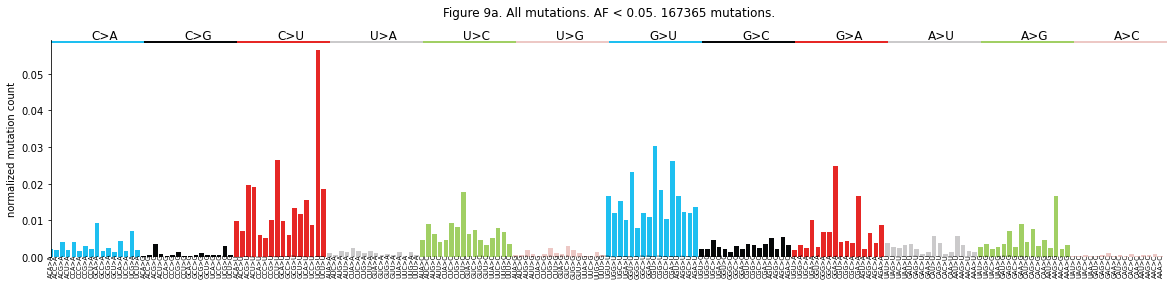

In [114]:
#Figure 9. All mutations. AF < 0.05
dfmenor005_unique_muts['FULL_MUT'] = dfmenor005_unique_muts.apply(get_mut, axis = 1)
dfmenor005_unique_muts_count=dfmenor005_unique_muts[['FULL_MUT', 'POS']]
dfmenor005_unique_muts_count = dfmenor005_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
dfmenor005_unique_muts_counter_triplets_order = dfmenor005_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = dfmenor005_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 9a. All mutations. AF < 0.05. "+str(len(dfmenor005_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.001),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/less005.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


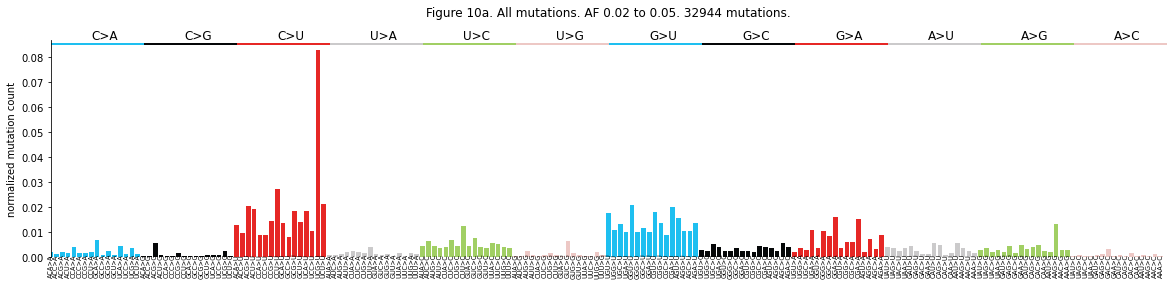

In [115]:
#Figure 10. All mutations. AF 0.02 - 0.05
df002_005_unique_muts['FULL_MUT'] = df002_005_unique_muts.apply(get_mut, axis = 1)
df002_005_unique_muts_count=df002_005_unique_muts[['FULL_MUT', 'POS']]
df002_005_unique_muts_count = df002_005_unique_muts_count.drop_duplicates().groupby(['FULL_MUT']).count().reset_index()
df002_005_unique_muts_counter_triplets_order = df002_005_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
for ix,mut in enumerate(list_order):
    val = df002_005_unique_muts_counter_triplets_order.get(mut, 0)
    #Normalitzation
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)
plt.title("Figure 10a. All mutations. AF 0.02 to 0.05. "+str(len(df002_005_unique_muts))+" mutations.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.0007,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("./img/002_005.png")
plt.show()

#### unique_muts['TRIPLET'] = unique_muts.apply(get_mut, axis = 1)